## Tarea 2: Redes Convolucionales

### Alejandro Hernández Rodríguez

#### Ejercicio 1

Diseña y entrena una red convolucional para el conjunto de datos CIFAR10. Explora diferentes
diseños buscando mejorar tus resultados en el ejercicio 4 de la tarea 1. Discute tus resultados. 

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from itertools import islice as take
from tqdm import trange
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [18]:
class CNN(nn.Module):
    
    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super(CNN, self).__init__()
        self.num_feats = 3 * 16 * 16

        # definición de bloques conv
        # [M, 3, 32, 32] => [M, 4, 14, 14]
        self.cnn = nn.Sequential(

            # bloque conv1
            # [M, 1, 28, 28] => [M, 4, 28, 28]
            nn.Conv2d(in_channels=3, out_channels=3, 
                      kernel_size=3, padding=1),
            # [M, 4, 28, 28]
            nn.ReLU(),
            # [M, 4, 28, 28] => [M, 4, 14, 14]
            nn.MaxPool2d(kernel_size=2, stride=2),

        )       
        
        # [M, 4, 14, 14] => [M, 4x14x14]
        self.flatten = nn.Flatten()

        # [M, 4x14x14] => [M, 1]
        self.cls = nn.Linear(self.num_feats, 10)
    
    # metodo para inferencia
    def forward(self, x):
        # [M, 1, 28, 28] => [M, 4, 14, 14]
        x = self.cnn(x)
        # [M, 4, 14, 14] => [M, 4x14x14]
        x = self.flatten(x)
        # [M, 4x14x14] => [M, 10]
        x = self.cls(x)
        return x

In [ ]:
class CNN(nn.Module):
    
    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super(CNN, self).__init__()
        self.num_feats = 3 * 16 * 16

        # definición de bloques conv
        # [M, 3, 32, 32] => [M, 4, 14, 14]
        self.cnn = nn.Sequential(

            # bloque conv1
            # [M, 1, 28, 28] => [M, 4, 28, 28]
            nn.Conv2d(in_channels=3, out_channels=3, 
                      kernel_size=3, padding=1),
            # [M, 4, 28, 28]
            nn.ReLU(),
            # [M, 4, 28, 28] => [M, 4, 14, 14]
            nn.MaxPool2d(kernel_size=2, stride=2),

        )       
        
        # [M, 4, 14, 14] => [M, 4x14x14]
        self.flatten = nn.Flatten()

        # [M, 4x14x14] => [M, 1]
        self.cls = nn.Linear(self.num_feats, 10)
    
    # metodo para inferencia
    def forward(self, x):
        # [M, 1, 28, 28] => [M, 4, 14, 14]
        x = self.cnn(x)
        # [M, 4, 14, 14] => [M, 4x14x14]
        x = self.flatten(x)
        # [M, 4x14x14] => [M, 10]
        x = self.cls(x)
        return x

In [25]:
class CNN2(nn.Module):
    
    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super(CNN2, self).__init__()
        self.num_feats = 3 * 16 * 16

        # definición de bloques conv
        # [M, 3, 32, 32] => [M, 4, 14, 14]
        self.cnn = nn.Sequential(

            # bloque conv1
            # [M, 1, 28, 28] => [M, 4, 28, 28]
            nn.Conv2d(in_channels=3, out_channels=3, 
                      kernel_size=3, padding=1),
            # [M, 4, 28, 28]
            nn.ReLU(),
            nn.Conv2d(in_channels=3, out_channels=3, 
                      kernel_size=3, padding=1),
            # [M, 4, 28, 28]
            nn.ReLU(),
            # [M, 4, 28, 28] => [M, 4, 14, 14]
            nn.MaxPool2d(kernel_size=2, stride=2),

        )       
        
        # [M, 4, 14, 14] => [M, 4x14x14]
        self.flatten = nn.Flatten()

        # [M, 4x14x14] => [M, 1]
        self.cls = nn.Linear(self.num_feats, 10)
    
    # metodo para inferencia
    def forward(self, x):
        # [M, 1, 28, 28] => [M, 4, 14, 14]
        x = self.cnn(x)
        # [M, 4, 14, 14] => [M, 4x14x14]
        x = self.flatten(x)
        # [M, 4x14x14] => [M, 10]
        x = self.cls(x)
        return x

In [26]:
model = CNN()
model2 = CNN2()
print(model)

CNN(
  (cnn): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (cls): Linear(in_features=768, out_features=10, bias=True)
)


In [27]:
def train_epoch(dl, model, opt):

    # por cada lote
    for x, y_true in dl:
        
        # computamos logits
        y_lgts = model(x)
        
        # computamos la pérdida
        loss = F.cross_entropy(y_lgts, y_true)
        
        # vaciamos los gradientes
        opt.zero_grad()
        
        # retropropagamos
        loss.backward()
        
        # actualizamos parámetros
        opt.step()


def eval_epoch(dl, model, num_batches=None):

    # evitamos que se registren las operaciones 
    # en la gráfica de cómputo
    with torch.no_grad():

        # historiales
        losses, accs = [], []

        # validación de la época con num_batches
        # si num_batches==None, se usan todos los lotes
        for x, y_true in take(dl, num_batches):

            # computamos los logits
            y_lgts = model(x)

            # computamos los puntajes
            y_prob = F.softmax(y_lgts, 1)

            # computamos la clases
            y_pred = torch.argmax(y_prob, 1)

            # computamos la pérdida
            loss = F.cross_entropy(y_lgts, y_true)

            # computamos la exactitud
            acc = (y_true == y_pred).type(torch.float32).mean()

            # guardamos históricos
            losses.append(loss.item())
            accs.append(acc.item())

        # promediamos
        loss = np.mean(losses) * 100
        acc = np.mean(accs) * 100

        return loss, acc
        
        
def train(model, trn_dl, tst_dl, lr=1e-3, epochs=20,
          trn_batches=None, tst_batches=None):

    # historiales
    loss_hist, acc_hist = [], []
    
    # optimizador
    opt = optim.SGD(model.parameters(), lr=lr)

    # ciclo de entrenamiento
    for epoch in trange(epochs):

        # entrenamos la época
        train_epoch(trn_dl, model, opt)

        # evaluamos la época en entrenamiento
        trn_loss, trn_acc = eval_epoch(trn_dl, model, trn_batches)
        # evaluamos la época en prueba
        tst_loss, tst_acc = eval_epoch(tst_dl, model, tst_batches)

        # guardamos historial
        loss_hist.append([trn_loss, tst_loss])
        acc_hist.append([trn_acc, tst_acc])

        # imprimimos progreso
        print(f'E{epoch:02} '
              f'loss=[{trn_loss:6.2f},{tst_loss:6.2f}] '
              f'acc=[{trn_acc:5.2f},{tst_acc:5.2f}]')

    return loss_hist, acc_hist

In [33]:
def plot_hist(loss_hist):
    train_loss, test_loss = zip(*loss_hist)

    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['Train Loss','Test Loss'])
    plt.grid()
    plt.show()

In [37]:
loss_hist, acc_hist = train(model2, trainloader, testloader, lr=0.001)


  5%|▌         | 1/20 [02:12<41:55, 132.40s/it]

E00 loss=[180.48,181.46] acc=[36.50,36.07]


 10%|█         | 2/20 [04:22<39:28, 131.58s/it]

E01 loss=[155.43,157.60] acc=[45.66,44.61]


 15%|█▌        | 3/20 [06:31<37:06, 130.98s/it]

E02 loss=[148.54,151.59] acc=[48.16,46.45]


 20%|██        | 4/20 [08:42<34:54, 130.88s/it]

E03 loss=[147.96,151.61] acc=[48.36,46.97]


 25%|██▌       | 5/20 [10:52<32:38, 130.55s/it]

E04 loss=[141.79,146.28] acc=[50.76,48.67]


 30%|███       | 6/20 [13:05<30:40, 131.50s/it]

E05 loss=[140.58,145.53] acc=[51.00,48.48]


 35%|███▌      | 7/20 [15:17<28:28, 131.45s/it]

E06 loss=[140.57,145.94] acc=[50.72,48.27]


 40%|████      | 8/20 [17:26<26:08, 130.70s/it]

E07 loss=[138.55,143.91] acc=[51.95,49.34]


 45%|████▌     | 9/20 [19:35<23:54, 130.43s/it]

E08 loss=[136.93,142.51] acc=[52.27,50.01]


 50%|█████     | 10/20 [21:46<21:43, 130.38s/it]

E09 loss=[136.29,142.05] acc=[52.51,49.32]


 55%|█████▌    | 11/20 [23:57<19:34, 130.53s/it]

E10 loss=[134.34,140.63] acc=[53.23,50.07]


 60%|██████    | 12/20 [26:07<17:23, 130.38s/it]

E11 loss=[135.10,141.84] acc=[53.50,50.64]


 65%|██████▌   | 13/20 [28:18<15:14, 130.64s/it]

E12 loss=[133.07,140.11] acc=[54.19,50.82]


 70%|███████   | 14/20 [30:30<13:06, 131.09s/it]

E13 loss=[131.00,138.00] acc=[54.72,51.59]


 75%|███████▌  | 15/20 [32:41<10:55, 131.10s/it]

E14 loss=[134.01,140.75] acc=[53.50,50.94]


 80%|████████  | 16/20 [34:52<08:44, 131.08s/it]

E15 loss=[129.13,136.99] acc=[55.20,51.56]


 85%|████████▌ | 17/20 [37:01<06:31, 130.54s/it]

E16 loss=[129.14,137.05] acc=[55.51,51.84]


 90%|█████████ | 18/20 [39:12<04:21, 130.66s/it]

E17 loss=[128.85,137.02] acc=[55.01,51.32]


 95%|█████████▌| 19/20 [41:23<02:10, 130.79s/it]

E18 loss=[129.19,137.66] acc=[55.00,51.34]


100%|██████████| 20/20 [43:33<00:00, 130.69s/it]

E19 loss=[127.04,135.69] acc=[55.73,52.37]


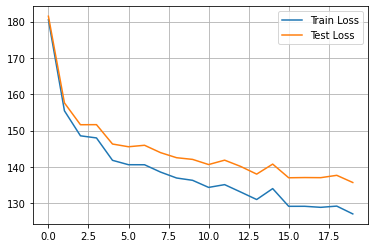

In [38]:
train_loss, test_loss = zip(*loss_hist)

plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['Train Loss','Test Loss'])
plt.grid()
plt.show()

In [39]:
loss_hist, acc_hist = train(model, trainloader, testloader, lr=0.001)


  5%|▌         | 1/20 [01:54<36:19, 114.69s/it]

E00 loss=[131.33,139.66] acc=[53.81,50.41]


 10%|█         | 2/20 [03:46<34:08, 113.83s/it]

E01 loss=[129.44,137.99] acc=[54.59,50.87]


 15%|█▌        | 3/20 [05:37<32:00, 112.96s/it]

E02 loss=[129.77,138.37] acc=[54.58,51.01]


 20%|██        | 4/20 [07:31<30:14, 113.40s/it]

E03 loss=[129.47,138.05] acc=[54.31,50.87]


 25%|██▌       | 5/20 [09:25<28:23, 113.56s/it]

E04 loss=[128.89,137.80] acc=[54.63,51.00]


 30%|███       | 6/20 [11:21<26:37, 114.09s/it]

E05 loss=[130.17,138.99] acc=[54.07,50.56]


 35%|███▌      | 7/20 [13:18<24:54, 114.96s/it]

E06 loss=[129.33,138.13] acc=[54.57,50.96]


 40%|████      | 8/20 [15:12<22:57, 114.77s/it]

E07 loss=[129.45,138.44] acc=[54.44,51.08]


 45%|████▌     | 9/20 [17:05<20:58, 114.40s/it]

E08 loss=[128.87,137.92] acc=[54.75,50.93]


 50%|█████     | 10/20 [19:00<19:03, 114.34s/it]

E09 loss=[128.72,137.74] acc=[54.81,51.37]


 55%|█████▌    | 11/20 [20:54<17:07, 114.19s/it]

E10 loss=[130.20,139.31] acc=[54.45,50.78]


 60%|██████    | 12/20 [22:48<15:14, 114.33s/it]

E11 loss=[130.93,139.97] acc=[53.82,50.01]


 65%|██████▌   | 13/20 [24:42<13:19, 114.25s/it]

E12 loss=[129.49,138.56] acc=[54.48,51.14]


 70%|███████   | 14/20 [26:36<11:24, 114.08s/it]

E13 loss=[128.48,137.92] acc=[55.00,51.07]


 75%|███████▌  | 15/20 [28:29<09:29, 113.82s/it]

E14 loss=[128.71,137.99] acc=[54.79,51.04]


 80%|████████  | 16/20 [30:22<07:33, 113.42s/it]

E15 loss=[128.49,138.08] acc=[54.80,51.18]


 85%|████████▌ | 17/20 [32:15<05:40, 113.36s/it]

E16 loss=[129.17,138.70] acc=[54.46,50.61]


 90%|█████████ | 18/20 [34:08<03:46, 113.35s/it]

E17 loss=[128.49,137.91] acc=[54.98,51.39]


 95%|█████████▌| 19/20 [36:00<01:52, 112.97s/it]

E18 loss=[129.45,139.06] acc=[54.61,50.66]


100%|██████████| 20/20 [37:54<00:00, 113.72s/it]

E19 loss=[128.61,138.29] acc=[55.13,51.26]


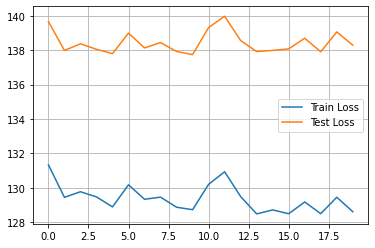

In [40]:
train_loss, test_loss = zip(*loss_hist)

plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['Train Loss','Test Loss'])
plt.grid()
plt.show()

Se observa que el modelo dos parece mantenerse en una banda de error entre 140 y 138. A diferencia del modelo 1 que disminuye de 180 a menos de 130, yo supongo que el error es mayor al princpio por el hechod de tener una capa extra de convolución.